In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Our ML tools ---
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler # <-- MUST-HAVE
from sklearn.decomposition import PCA # <-- The star of the show!

# --- Load the Data ---
iris = load_iris()
X = iris.data   # 4 features
y = iris.target # 3 species (0, 1, 2)



In [2]:

# --- 2. Prepare the Data ---
# Vijay: "Okay, I'm not even gonna ask. PCA is based
# on variance, so we MUST scale first!"
# AK: "You're a pro!" 😄

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [3]:

# --- 3. Create & 'Fit' the PCA Model ---
# 1. Import (done)
# 2. Create instance
#    We want to squash 4 features down to 2, so we can plot it!
pca = PCA(n_components=2)

# 3. FIT!
# This is where it does the math to find the 2 "best shadow angles"
print("\n...Finding the best 'shadow angles' (Principal Components)...")
pca.fit(X_scaled)
print("...Found them!...")




...Finding the best 'shadow angles' (Principal Components)...
...Found them!...



Original data shape: (150, 4)
New data shape: (150, 2)

--- New 2D DataFrame ---
   Principal Component 1  Principal Component 2 species
0              -2.264703               0.480027  Setosa
1              -2.080961              -0.674134  Setosa
2              -2.364229              -0.341908  Setosa
3              -2.299384              -0.597395  Setosa
4              -2.389842               0.646835  Setosa


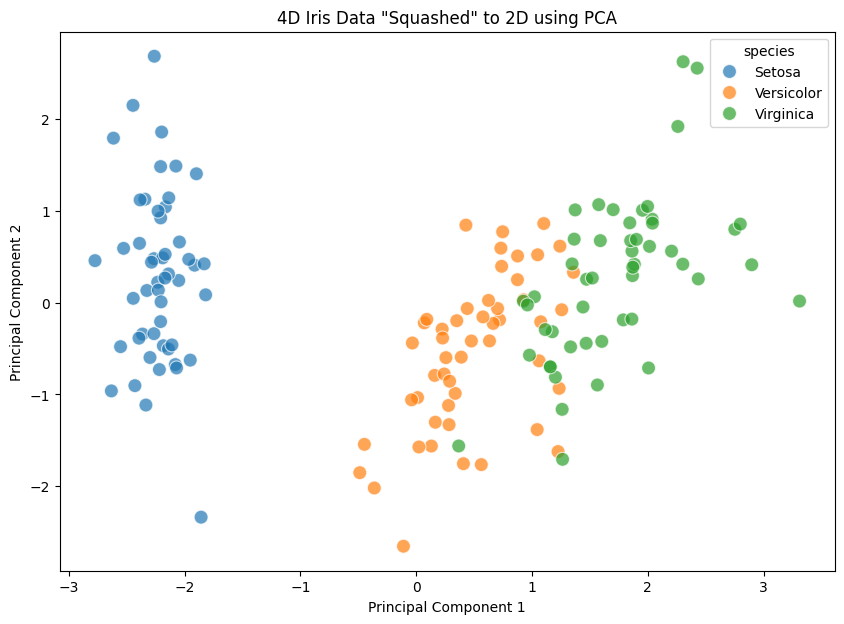

In [4]:

# --- 4. Transform (The 'Squash'!) ---
# Now we use those angles to "squash" the data
X_pca = pca.transform(X_scaled)

print(f"\nOriginal data shape: {X_scaled.shape}")
print(f"New data shape: {X_pca.shape}")

# --- 5. Visualize! ---
# Let's make a DataFrame with our new 2D data
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
# Add the *original* flower species so we can color our dots
pca_df['species'] = y
# Map numbers to names
pca_df['species'] = pca_df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

print("\n--- New 2D DataFrame ---")
print(pca_df.head())

# Plot our new 2D data!
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='species', data=pca_df, s=100, alpha=0.7)
plt.title('4D Iris Data "Squashed" to 2D using PCA')
plt.show()

